In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('Online Retail.xlsx')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df_cluster = df[['Quantity', 'UnitPrice', 'CustomerID']]

In [7]:
df_cluster = df_cluster.dropna()

In [12]:
df_cluster.head()

,Quantity,UnitPrice,CustomerID,Cluster
0,6,2.55,17850.0,0
1,6,3.39,17850.0,0
2,8,2.75,17850.0,0
3,6,3.39,17850.0,0
4,6,3.39,17850.0,0


In [8]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_cluster)

sse = [] 

In [9]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)

C:\Users\INAYAT IT SERVICES\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\INAYAT IT SERVICES\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\INAYAT IT SERVICES\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\INAYAT IT SERVICES\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\INAYAT IT SERVICES\anaconda3\Lib\subprocess.py", line

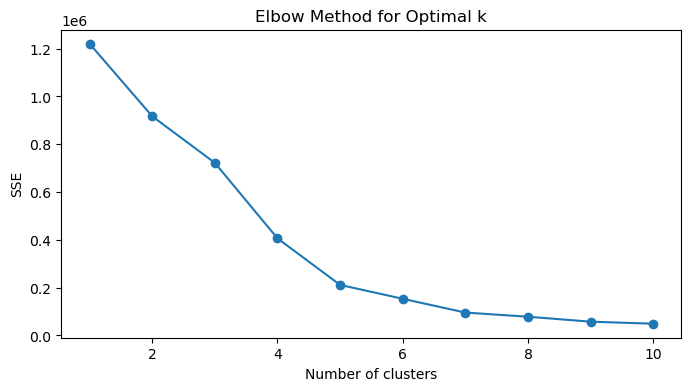

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

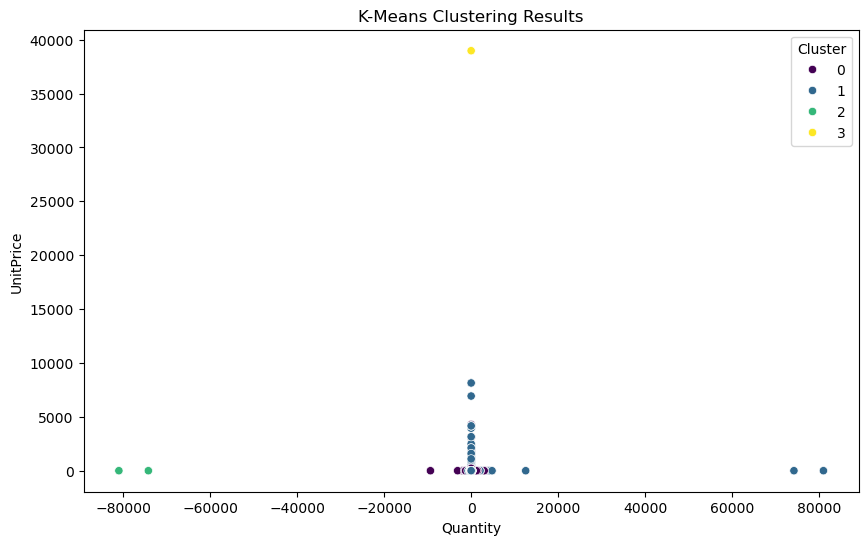

In [11]:
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_normalized)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()
